In [1]:
import math

# HUMAN EYE - Contrast Sensitivity Function

In [2]:
pi = math.pi
def optimal_distance(res,size,max_dist,opt_spatial_freq = 6):
    opt_distance = (size/res)*(opt_spatial_freq/math.tan(pi/360))
    return min(opt_distance,max_dist)

In [3]:
# size = float(input('Enter Size of TV (Width) in inches : '))
# res =  int(input('Enter resolution (Width) in pixels : '))
# available_dist = float(input('Enter maximum distance at which couch can be placed in inches : '))

size = 50 ## inches
res = (1920,1080)
available_dist = 200 ## inches

In [4]:
print('Optimal Distance (6 cycles per degree): ',optimal_distance(res[0],size,available_dist),'inches')

Optimal Distance (6 cycles per degree):  17.90447658270463 inches


In [5]:
print('Optimal Distance (60 cycles per degree): ',optimal_distance(res[0],size,available_dist,opt_spatial_freq = 60),'inches')

Optimal Distance (60 cycles per degree):  179.0447658270463 inches


#                            GRAY SCALE IMAGES    

In [6]:
from matplotlib import pyplot as plt
import numpy as np

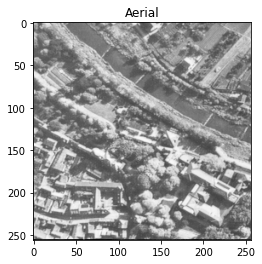

In [7]:
I = plt.imread('5.1.10.tiff')
imgaplot = plt.imshow(I,cmap = 'gray')
plt.title('Aerial')
plt.show()

In [8]:
print('maximum intensity = ',np.max(I))
print('minimum intensity = ',np.min(I))

maximum intensity =  248
minimum intensity =  1


#### As we can clearly see the intensity varies from 1 to 248. So 8 bits would be sufficient to represent each pixel

## Image Resolution

In [9]:
print('Image Width = ',I.shape[0])
print('Image Height = ',I.shape[1])

Image Width =  256
Image Height =  256


### Size of image file is 64kB = 512,000 bytes

In [10]:
image_size = 64000*8

In [11]:
total_bits = I.shape[0]*I.shape[1]*8
print('Actual Number of bits needed to represent the image = ',total_bits)

Actual Number of bits needed to represent the image =  524288


In [12]:
compression = 100 - (image_size/total_bits)*100
print('The image has been compressed by ',compression,'%')

The image has been compressed by  2.34375 %


## Function accepts img and bit plane number as input and displays a binary image of the corresponding bit plane. It returns the binary image

In [13]:
def bitPlane(bitPlane,img):
    bitImg = (img%2**(bitPlane+1))*255
    imgplot = plt.imshow(bitImg,cmap = 'gray')
    return bitImg

In [14]:
### displaying 0th bit plane of I (Aerial)

array([[  0,   0,   0, ..., 255,   0,   0],
       [255,   0,   0, ...,   0, 255,   0],
       [  0,   0, 255, ...,   0, 255,   0],
       ...,
       [  0,   0, 255, ..., 255,   0, 255],
       [  0,   0, 255, ...,   0, 255,   0],
       [  0,   0,   0, ..., 255, 255,   0]], dtype=uint8)

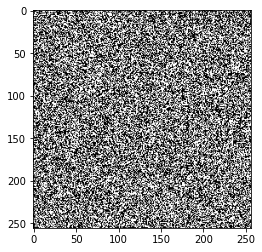

In [15]:
bitPlane(0,I)

# BINARY IMAGE PROCESSING

## Function which returns the histogram

In [16]:
def histogram(img,display = False,bins_ = 20):
    histogram = np.histogram(img,bins=bins)
    
    if( display):
        plt.title("Histogram")
        plt.xlabel("Intensity")
        plt.ylabel("Frequency")
        plt.plot(histogram[0])
        plt.show()

    ## Returning only the histogram
    return histogram[0]

### HISTOGRAM FOR AIRPLANE IMAGE

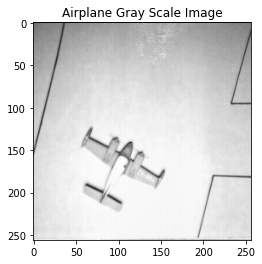

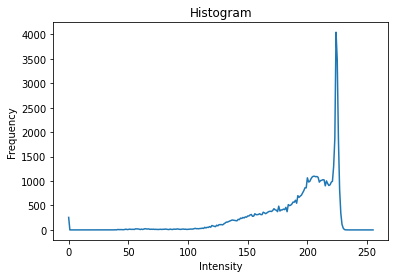

MODE =  224


In [17]:
airplane = plt.imread('5.1.11.tiff')
plt.imshow(airplane,cmap = 'gray')
plt.title("Airplane Gray Scale Image")
plt.show()
bins = np.linspace(0, 256, 257)
mode = np.argmax(histogram(airplane,True,bins_ = bins))
print('MODE = ',mode)

## The histogram is unimodal with mode = 224

### HISTOGRAM FOR TRUCK IMAGE

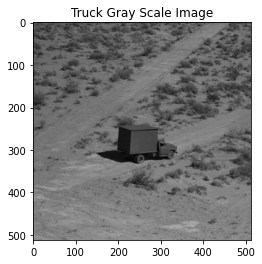

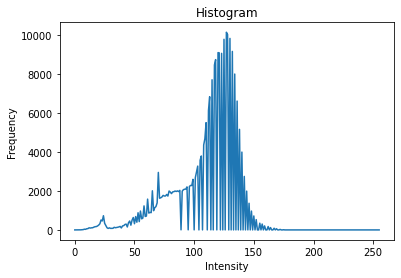

MODE =  127


In [18]:
truck = plt.imread('7.1.01.tiff')
plt.imshow(truck,cmap = 'gray')
plt.title("Truck Gray Scale Image")
plt.show()
bins = np.linspace(0, 256, 257)
mode = np.argmax(histogram(truck,True,bins_ = bins))
print('MODE = ',mode)

## The histogram is unimodal with mode = 127

### HISTOGRAM FOR AIRPORT

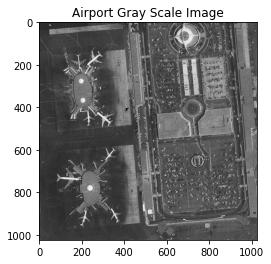

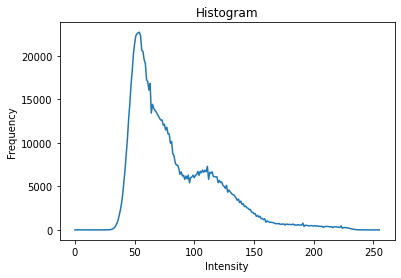

MODE =  54


In [19]:
airport = plt.imread('5.3.02.tiff')
plt.imshow(airport,cmap = 'gray')
plt.title("Airport Gray Scale Image")
plt.show()
bins = np.linspace(0, 256, 257)
mode = np.argmax(histogram(airport,True,bins_ = bins))
print('MODE = ',mode)

## The histogram is unimodal with mode = 54

### HISTOGRAM FOR APC

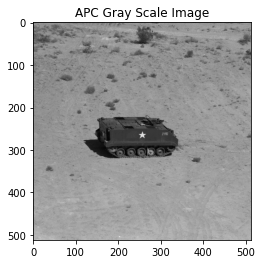

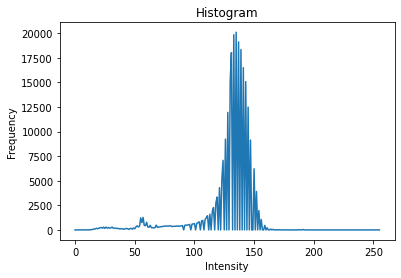

MODE =  135


In [20]:
APC = plt.imread('7.1.08.tiff')
plt.imshow(APC,cmap = 'gray')
plt.title("APC Gray Scale Image")
plt.show()
bins = np.linspace(0, 256, 257)
mode = np.argmax(histogram(APC,True,bins_ = bins))
print('MODE = ',mode)

## The histogram is unimodal with mode = 135

### Function to convert grayscale image to binary

In [21]:
def binarise(img,threshold,display = False):

    binary = np.where(img >=threshold,255,0)
    if display:
        imgplot = plt.imshow(binary,cmap='gray')
        plt.show()
    return binary

### Binarsing Airplane using the mode (224) as threshold

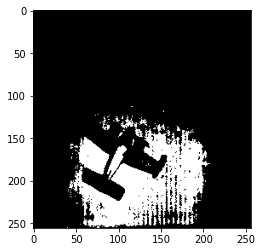

In [22]:
airplane_binary = binarise(airplane,224,True)

### Binarsing Truck using the mode (127) as threshold

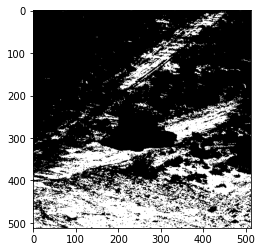

In [23]:
truck_bin = binarise(truck,127,True)

### Binarsing APC using the mode (135) as threshold

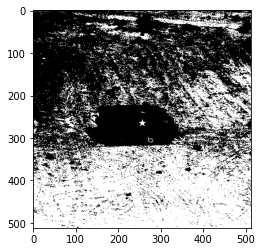

In [24]:
APC_bin = binarise(APC,135,True)

### Binarising Airport using the mode(54)

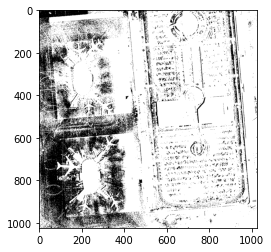

In [25]:
Airport_bin = binarise(airport,54,True)

### We can see all the above images have not been binarised well. This approach is quite trivial

## OTSU's ALGORITHM

### FUNCTION TO OBTAIN PMF FROM IMAGE

In [26]:
def PMF(img,display = False):
    bins = np.linspace(0, 256, 257)
    total_bits = img.shape[0]*img.shape[1]
    pmf = histogram(img,display = False,bins_ = bins)/total_bits
    if display:
        plt.title('Normalised Histogram - PDF')
        plt.xlabel('Intensity')
        plt.plot(pmf)
        plt.show()
    return pmf

### FUNCTION TO OBTAIN CDF FROM IMAGE

In [27]:
def CDF(img,display = False):
    pmf = PMF(img)
    cdf = np.zeros(256)
    cdf[0] = pmf[0]
    for t in range(1,256):
        cdf[t] = cdf[t-1] + pmf[t]
    if display:
        plt.title('CDF')
        plt.xlabel('Intensity')
        plt.plot(cdf)
        plt.show()
    return cdf
    

### VERIFICATION WITH AIRPLANE IMAGE

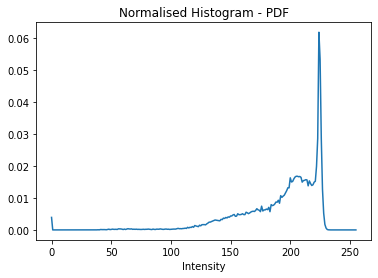

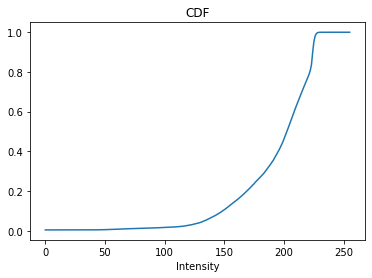

In [28]:
pmf = PMF(airplane,True)
cdf = CDF(airplane,True)

## APPROACH 1

In [29]:
def otsu1(img,cdf):
    min_intraVar = 10000000
    threshold = 0
    #print(np.var(np.where(pdf<120/total_bits)))
    #print(pdf)
    for t in range(1,255):
        if cdf[t] == 0:
            var0 = 0
        else :
            var0 = np.var(np.where(img<t))
        if cdf[t] == 1:
            var1 = 0
        else:
            var1 = np.var(np.where(img>=t))
        intraVar = cdf[t]*var0 + (1-cdf[t])*var1
        
        if intraVar < min_intraVar :
            threshold = t
            min_intraVar = intraVar
    return threshold


threshold =  191


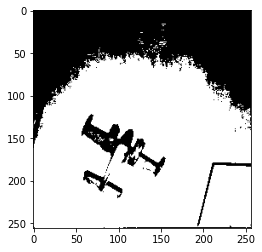

In [30]:
threshold = otsu1(airplane,cdf)
print('threshold = ',threshold)
airplane_binary = binarise(airplane,threshold,True)

## Approach 2

In [31]:
def otsu2(img,pmf):
    P = np.zeros(256)
    P[0] =pmf[0]
    mean0 = np.zeros(256)
    mean1 = np.zeros(256)
    threshold = 0
    max_interVar = -10000000
    image_mean = np.mean(img)
    for t in range(0,255):
        P[t+1] = P[t] + pmf[t+1]
        if P[t+1] == 0:
            mean0[t+1] = 0
        else :
            mean0[t+1] = (mean0[t]*P[t] + (t+1)*pmf[t+1])/(P[t+1])
        if P[t+1] == 1:
            mean1[t+1] = 1
        else:
            mean1[t+1] = (image_mean-mean0[t+1]*P[t+1])/(1-P[t+1])
        interVar = P[t+1]*(1-P[t+1])*(mean0[t+1]-mean1[t+1])**2
        #print(t,mean0[t+1],mean1[t+1],intraVar)
        if interVar > max_interVar:
            threshold  = t
            max_interVar = interVar
    return threshold


threshold =  177


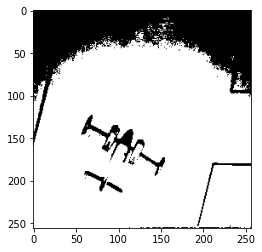

In [32]:
threshold = otsu2(airplane,pmf)
print('threshold = ',threshold)
airplane_binary = binarise(airplane,threshold,display=True)

## CONNECTED COMPONENTS ALGORITHM

In [33]:
def Connected_Components(img):
    k = 0
    R = np.zeros((img.shape[0],img.shape[1]))
 
    conflict = {}

    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            #print(img[i][j],img[i-1][j],img[i][j-1])
            
            if img[i][j] == 0 and img[i-1][j] ==255 and img[i][j-1] == 255:
                R[i][j] = k
                k += 1
                #count+=1
    

            elif img[i][j] == 0 and img[i-1][j] ==255 and img[i][j-1] == 0:
                R[i][j] = R[i][j-1]
        
            elif img[i][j] == 0 and img[i-1][j] ==0 and img[i][j-1] == 255:
                R[i][j] = R[i-1][j]
        
            elif img[i][j] == 0 and img[i-1][j] ==255 and img[i][j-1] == 255:
                a = min(R[i-1][j],R[i][j-1])
                R[i][j] = a
                conflict[max(R[i-1][j],R[i][j-1])] = a
        
                
    #print(conflict)
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            
            if R[i][j] in conflict:
                R[i][j] = conflict[R[i][j]]

    k  = len(np.unique(R))         
        
    return R,k

### Working with airplane image

In [34]:
R,k = Connected_Components(airplane_binary)
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(R,k)
print(airplane_binary.shape)
index,count = np.unique(R,return_counts=True)
#print(index,count)
largest_blob_index = np.argmax(count)
largest_blob = np.max(count)
print(largest_blob_index,largest_blob)

(256, 256)
0 64848


In [35]:
def minor_blob_removal(img,R,index):
    #print(img.shape)
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            #print(i,j)
            if img[i][j] == 0 and R[i][j] != index:
                img[i][j] = 255
    return img

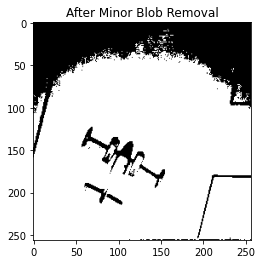

In [36]:
compliment = 255- airplane_binary
new_img = 255-minor_blob_removal(compliment,R,largest_blob_index)
plt.imshow(new_img,cmap = 'gray')
plt.title('After Minor Blob Removal')
plt.show()

# BINARY MORPHOLOGY

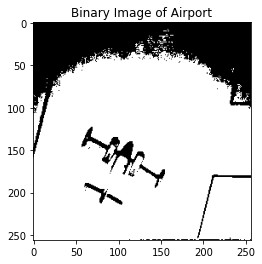

In [37]:
plt.imshow(airplane_binary,cmap ='gray')
plt.title('Binary Image of Airport')
plt.show()

In [38]:
def erode(img,window):
    
    eroded = np.zeros((img.shape[0],img.shape[1]))
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            res = 1
            for x in window:
                res = res and img[i+x[0]][j+x[1]]
            eroded[i][j] = res
    return eroded
    

In [39]:
def dilate(img,window):
 
    dilated = np.zeros((img.shape[0],img.shape[1]))
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            res = 0
            for x in window:
                res = res or img[i+x[0]][j+x[1]]
            dilated[i][j] = res
    return dilated

In [40]:
def median(img, window):
    median_img = np.zeros((img.shape[0],img.shape[1]))
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            count =0
            for x in window:
                if img[i+x[0]][j+x[1]] == 1:
                    count+=1
            if count > len(window)/2:
                median_img[i][j] = 1
            else:
                median_img[i][j] = 0
    return img

In [41]:
cross = np.array([[-1,0],[0,-1],[0,0],[0,1],[1,0]])
square = np.array([[-1,-1],[-1,0],[1,0],[0,-1],[0,0],[0,1],[1,-1],[1,0],[1,1]])

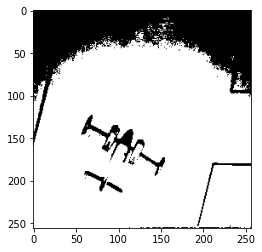

In [42]:
dilated_cross  = (dilate(airplane_binary,cross))
plt.imshow(airplane_binary,cmap = 'gray')
plt.show()

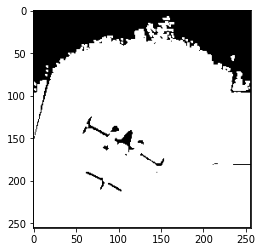

In [43]:
dilated_square  = dilate(airplane_binary,square)
plt.imshow(dilated_square,cmap = 'gray')
plt.show()

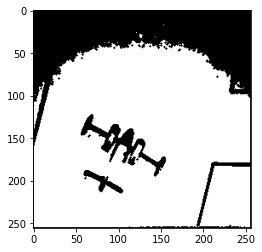

In [44]:
eroded_cross = erode(airplane_binary,cross)
plt.imshow(eroded_cross,cmap = 'gray')
plt.show()

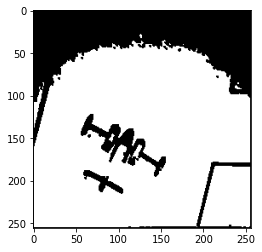

In [45]:
eroded_square = erode(airplane_binary,square)
plt.imshow(eroded_square,cmap = 'gray')
plt.show()

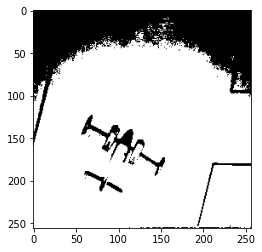

In [46]:
median_cross = median(airplane_binary,cross)
plt.imshow(median_cross,cmap = 'gray')
plt.show()

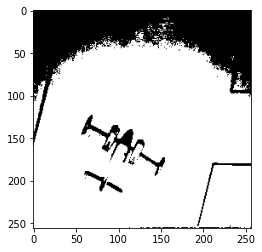

In [47]:
median_square = median(airplane_binary,square)
plt.imshow(median_square,cmap = 'gray')
plt.show()

##  EROSION AND DILATION ARE DUALS

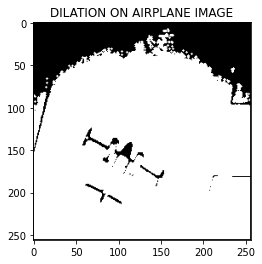

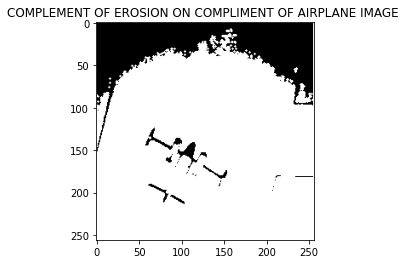

In [48]:
airplane_compliment = 255 - airplane_binary
dilated_cross = dilate(airplane_binary,cross)
plt.imshow(dilated_cross,cmap='gray')
plt.title('DILATION ON AIRPLANE IMAGE')
plt.show()
eroded_cross = erode(airplane_compliment,cross)
dual = 255- eroded_cross
plt.imshow(dual,cmap='gray')
plt.title('COMPLEMENT OF EROSION ON COMPLIMENT OF AIRPLANE IMAGE ')
plt.show()

### Difference between the two (Kindly ignore the corners)

In [49]:
diff = dilated_cross - dual
print(diff[1:-1,1:-1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


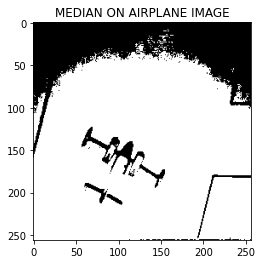

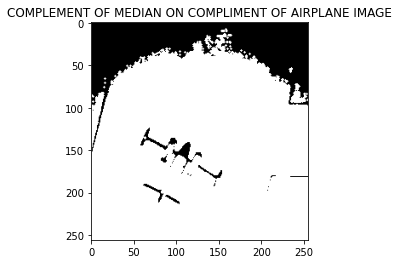

In [50]:
airplane_compliment = 255 - airplane_binary
median_cross = median(airplane_binary,cross)
plt.imshow(median_cross,cmap='gray')
plt.title('MEDIAN ON AIRPLANE IMAGE')
plt.show()
median_ecross = erode(airplane_compliment,cross)
dual = 255- median_ecross
plt.imshow(dual,cmap='gray')
plt.title('COMPLEMENT OF MEDIAN ON COMPLIMENT OF AIRPLANE IMAGE')
plt.show()

### Difference between the two (Kindly ignore the corners)

In [51]:
diff = median_cross - dual
print(diff[1:-1,1:-1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### OPEN AND CLOSE OPERATIONS

In [52]:
def Open(img,window):
    
    step1 = erode(img,window)
    step2 = dilate(step1,window)
    
    return step2

In [53]:
def Close(img,window):
    
    step1 = dilate(img,window)
    step2 = erode(step1,window)
    
    return step2

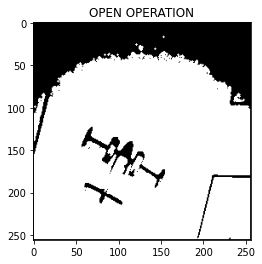

In [54]:
open_filter = Open(airplane_binary,cross)
plt.imshow(open_filter,cmap='gray')
plt.title('OPEN OPERATION')
plt.show()

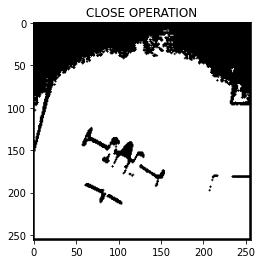

In [55]:
close_filter = Close(airplane_binary,cross)
plt.imshow(close_filter,cmap='gray')
plt.title('CLOSE OPERATION')
plt.show()

### OPEN-CLOS and CLOS-OPEN OPERATIONS

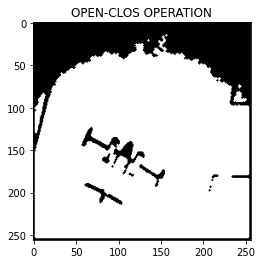

In [56]:
open_close = Open(Close(airplane_binary,cross),cross)
plt.imshow(open_close,cmap='gray')
plt.title('OPEN-CLOS OPERATION')
plt.show()

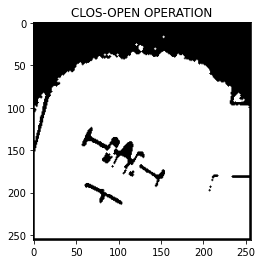

In [57]:
close_open = Close(Open(airplane_binary,cross),cross)
plt.imshow(close_open,cmap='gray')
plt.title('CLOS-OPEN OPERATION')
plt.show()

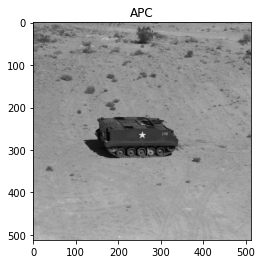

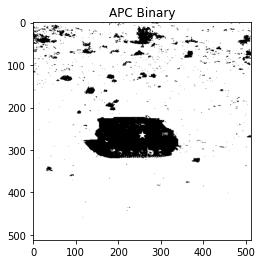

In [58]:
plt.imshow(APC,cmap ='gray')
plt.title('APC')
plt.show()
pmf = PMF(APC)
threshold = otsu2(APC,pmf)
APC_bin = binarise(APC,threshold)
plt.imshow(APC_bin,cmap ='gray')
plt.title('APC Binary')
plt.show()

In [59]:
compliment = 255- APC_bin
R,k = Connected_Components(compliment)
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(R,k)
index,count = np.unique(R,return_counts=True)
#print(index,count)
largest_blob_index = np.argmax(count)
largest_blob = np.max(count)
print('Number of Pixels',largest_blob)

Number of Pixels 260916
